In [205]:
# import libs
import numpy as np
import pickle

In [206]:
# get the train data
with open ('train_qa.txt', 'rb') as f:
  train_data = pickle.load(f) 

# get the test data
with open ('test_qa.txt', 'rb') as f:
  test_data = pickle.load(f) 

In [207]:
type(train_data)

list

In [208]:
print("Length of the training data: ", len(train_data))
print("Length of the test data: ", len(test_data))

Length of the training data:  10000
Length of the test data:  1000


In [209]:
train_data[0] # story -> question -> answer

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [210]:
' '.join(train_data[0][0]) # story

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [211]:
' '.join(train_data[0][1]) # question

'Is Sandra in the hallway ?'

In [212]:
' '.join(train_data[0][2]) # answer

'n o'

In [213]:
data = train_data + test_data

In [214]:
len(data)

11000

In [215]:
# Set items are unordered, unchangeable, and do not allow duplicate values.
vocab = set()

for story, question, answer in data:
  # Union of two given sets is the set which contains all the elements of both the sets
  vocab = vocab.union(set(story))
  vocab = vocab.union(set(question))

In [216]:
# add vocab to possible answers
vocab.add('no')
vocab.add('yes')

In [217]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [218]:
vocab_len = len(vocab) + 1 # +1 is for the placeholder

In [219]:
vocab_len

38

In [220]:
# longest story
data_len = [len(ldata[0]) for ldata in data] 
max_story_len = max(data_len)
max_story_len

156

In [221]:
# longest question 
max_ques_len = max([len(ldata[1]) for ldata in data])
max_ques_len

6

In [222]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [223]:
tokenizer = Tokenizer(filters=[]) # filters is an empty list because we don't wanna filter any kind of punctuation
tokenizer.fit_on_texts(vocab)

In [224]:
tokenizer.word_index # automatically vocabs are lower case

{'is': 1,
 'garden': 2,
 'hallway': 3,
 'office': 4,
 'back': 5,
 'there': 6,
 'daniel': 7,
 'dropped': 8,
 'kitchen': 9,
 'travelled': 10,
 'yes': 11,
 'the': 12,
 'in': 13,
 'john': 14,
 'to': 15,
 '?': 16,
 'apple': 17,
 'bedroom': 18,
 'up': 19,
 'put': 20,
 'bathroom': 21,
 'moved': 22,
 'picked': 23,
 'down': 24,
 'grabbed': 25,
 'milk': 26,
 '.': 27,
 'left': 28,
 'no': 29,
 'went': 30,
 'got': 31,
 'took': 32,
 'mary': 33,
 'football': 34,
 'sandra': 35,
 'journeyed': 36,
 'discarded': 37}

In [225]:
train_story_text = []
train_quest_text = []
train_answer_text = []

for story, question, answer in train_data:
  train_story_text.append(story)
  train_quest_text.append(question)
  train_answer_text.append(answer) 

In [226]:
train_quest_text[:5]

[['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
 ['Is', 'Daniel', 'in', 'the', 'office', '?'],
 ['Is', 'Daniel', 'in', 'the', 'bedroom', '?'],
 ['Is', 'Daniel', 'in', 'the', 'bedroom', '?']]

In [227]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)
len(train_story_seq)

10000

In [228]:
train_story_seq[:2]

[[33, 22, 15, 12, 21, 27, 35, 36, 15, 12, 18, 27],
 [33,
  22,
  15,
  12,
  21,
  27,
  35,
  36,
  15,
  12,
  18,
  27,
  33,
  30,
  5,
  15,
  12,
  18,
  27,
  7,
  30,
  5,
  15,
  12,
  3,
  27]]

In [229]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len, max_ques_len=max_ques_len):
  X = [] # stories
  Xq = [] # questions
  Y = [] # answers

  for story, query, answer in data:
    x = [word_index[word.lower()] for word in story]
    xq = [word_index[word.lower()] for word in query]

    y = np.zeros(len(word_index)+1)
    y[word_index[answer]] = 1

    X.append(x)
    Xq.append(xq)
    Y.append(y)

  return (pad_sequences(X, maxlen=max_story_len), pad_sequences(Xq, maxlen=max_ques_len), np.array(Y))

In [230]:
input_train, queries_train, answer_train = vectorize_stories(train_data)

In [231]:
input_test, queries_test, answer_test = vectorize_stories(test_data)

In [232]:
input_test

array([[ 0,  0,  0, ..., 12, 18, 27],
       [ 0,  0,  0, ..., 12,  2, 27],
       [ 0,  0,  0, ..., 12,  2, 27],
       ...,
       [ 0,  0,  0, ..., 12, 17, 27],
       [ 0,  0,  0, ..., 12,  2, 27],
       [ 0,  0,  0, ..., 17,  6, 27]], dtype=int32)

In [233]:
# end-to-end memory network
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout, add, dot, concatenate, LSTM

In [234]:
# placeholder shape=(max_story_len, batch_size)
input_sequence = Input((max_story_len, ))
question = Input((max_ques_len, ))

In [235]:
# input encoder M
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_len, output_dim=64))
input_encoder_m.add(Dropout((0.3)))

In [236]:
# input encoder C
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_len, output_dim=max_ques_len))
input_encoder_c.add(Dropout((0.3)))

In [237]:
# question encoder
ques_encoder = Sequential()
ques_encoder.add(Embedding(input_dim=vocab_len, output_dim=64, input_length=max_ques_len))
ques_encoder.add(Dropout((0.3)))

In [238]:
# encoded <-- encoder(input)
input_encoded_m =  input_encoder_m(input_sequence)
input_encoded_c =  input_encoder_c(input_sequence)
ques_encoded =  ques_encoder(question)

In [239]:
match = dot([input_encoded_m, ques_encoded], axes=(2, 2))
match = Activation('softmax')(match)

In [240]:
response = add([match, input_encoded_c])
response = Permute((2, 1))(response)

In [241]:
answer = concatenate([response, ques_encoded])
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate_4')>

In [242]:
answer = LSTM(32)(answer)
answer = Dropout(0.5)(answer)
answer = Dense(vocab_len)(answer)

In [243]:
answer = Activation('softmax')(answer)
model = Model([input_sequence, question], answer)

In [244]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [245]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_10 (InputLayer)          [(None, 6)]          0           []                               
                                                                                                  
 sequential_13 (Sequential)     (None, None, 64)     2432        ['input_9[0][0]']                
                                                                                                  
 sequential_15 (Sequential)     (None, 6, 64)        2432        ['input_10[0][0]']               
                                                                                            

In [249]:
history = model.fit([input_train, queries_train], answer_train, batch_size=32, epochs=15, validation_data=([input_test, queries_test], answer_test))

Epoch 1/15
313/313 [==============================] - 5s 16ms/step - loss: 0.6937 - accuracy: 0.5031 - val_loss: 0.6937 - val_accuracy: 0.4850
Epoch 2/15
313/313 [==============================] - 5s 15ms/step - loss: 0.6905 - accuracy: 0.5135 - val_loss: 0.6879 - val_accuracy: 0.5140
Epoch 3/15
313/313 [==============================] - 5s 15ms/step - loss: 0.6672 - accuracy: 0.5726 - val_loss: 0.6544 - val_accuracy: 0.6250
Epoch 4/15
313/313 [==============================] - 5s 15ms/step - loss: 0.6414 - accuracy: 0.6310 - val_loss: 0.6208 - val_accuracy: 0.6720
Epoch 5/15
313/313 [==============================] - 5s 15ms/step - loss: 0.6229 - accuracy: 0.6600 - val_loss: 0.6108 - val_accuracy: 0.6860
Epoch 6/15
313/313 [==============================] - 5s 15ms/step - loss: 0.6172 - accuracy: 0.6698 - val_loss: 0.6056 - val_accuracy: 0.6860
Epoch 7/15
313/313 [==============================] - 5s 15ms/step - loss: 0.5993 - accuracy: 0.6834 - val_loss: 0.5989 - val_accuracy: 0.6920

Text(0.5, 1.0, 'Model accuracy')

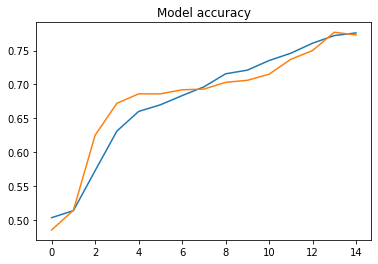

In [250]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')

Text(0.5, 1.0, 'Model loss')

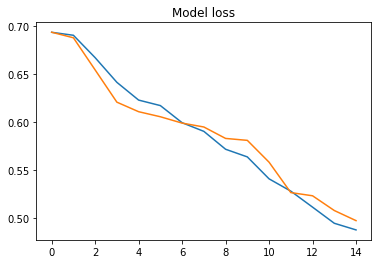

In [251]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')

In [252]:
# predictions
pred_res = model.predict(([input_test, queries_test]))

In [254]:
val_max = np.argmax(pred_res[0])

for key, val in tokenizer.word_index.items():
  if val == val_max:
    k = key
    

In [256]:
print("Test story ----> ", test_data[0][0])
print("\nTest question ----> ", test_data[0][1])
print("\nActual answer ----> ", test_data[0][2])
print("\nPredicted answer ----> ",  k)
print("\nProbability of the answer ----> ",  pred_res[0][val_max])

Test story ---->  ['Mary', 'got', 'the', 'milk', 'there', '.', 'John', 'moved', 'to', 'the', 'bedroom', '.']

Test question ---->  ['Is', 'John', 'in', 'the', 'kitchen', '?']

Actual answer ---->  no

Predicted answer ---->  no

Probability of the answer ---->  0.8478514


In [257]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [259]:
my_story = 'Daniel went to kitchen . Sandra took the discarded apple in the office .'
my_ques = 'Is the apple in the kitchen ?'
my_data = [(my_story.split(), my_ques.split(), 'yes')] # I used to split function to get the exact same format with the original data
my_data

[(['Daniel',
   'went',
   'to',
   'kitchen',
   '.',
   'Sandra',
   'took',
   'the',
   'discarded',
   'apple',
   'in',
   'the',
   'office',
   '.'],
  ['Is', 'the', 'apple', 'in', 'the', 'kitchen', '?'],
  'yes')]

In [260]:
my_story, my_ques, my_ans = vectorize_stories(my_data)

In [262]:
# predict on the new data
pred = model.predict(([my_story, my_ques]))

val_max = np.argmax(pred[0])

for key, val in tokenizer.word_index.items():
  if val == val_max:
    k = key 


print("Test story ----> ", my_data[0][0])
print("\nTest question ----> ", my_data[0][1])
print("\nActual answer ----> ", my_data[0][2])
print("\nPredicted answer ----> ",  k)
print("\nProbability of the answer ----> ",  pred[0][val_max])

Test story ---->  ['Daniel', 'went', 'to', 'kitchen', '.', 'Sandra', 'took', 'the', 'discarded', 'apple', 'in', 'the', 'office', '.']

Test question ---->  ['Is', 'the', 'apple', 'in', 'the', 'kitchen', '?']

Actual answer ---->  yes

Predicted answer ---->  yes

Probability of the answer ---->  0.71851397
